In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  openssl                                 1.1.1g-h516909a_0 --> 1.1.1g-h516909a_1



openssl-1.1.1g       | 2.1 MB    | #####

In [2]:
Geocity_df = pd.read_excel('city_ca.xlsx')

In [3]:
Geocity_df.shape

(118, 4)

In [4]:
Geocity_df.head()

,ID,LAT,LON,Location
0,[S11],41.48,-120.53,"Alturas,CA"
1,[ACV],40.98,-124.10,"Arcata,CA"
2,[BFL],35.43,-119.05,"Bakersfield,CA"
3,[BAB],39.13,-121.45,"Beale AFB,CA"
4,[BUO],33.93,-116.95,"Beaumont,CA"


In [5]:
address = 'California'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate are {}, {}.'.format(latitude, longitude))

The geograpical coordinate are 36.7014631, -118.7559974.


In [6]:
# create map of New York using latitude and longitude values
map_city = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, neighborhood in zip(Geocity_df['LAT'],Geocity_df['LON'], Geocity_df['Location']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_city)  
    
map_city


In [8]:
CLIENT_ID = 'EI2DUPWAWDSGLRKX5W53NCHPOJ3JEK4KNJWRUL4YAX4VSDII' # your Foursquare ID
CLIENT_SECRET = 'CCDGYEKQYT2R0EZSSYEHFCLNS5PYKQZ20BVSZLPLKFM1LG0K' # your Foursquare Secret
VERSION = '20200725' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EI2DUPWAWDSGLRKX5W53NCHPOJ3JEK4KNJWRUL4YAX4VSDII
CLIENT_SECRET:CCDGYEKQYT2R0EZSSYEHFCLNS5PYKQZ20BVSZLPLKFM1LG0K


In [9]:
neighborhood_latitude = Geocity_df.loc[2, 'LAT'] # neighborhood latitude value
neighborhood_longitude = Geocity_df.loc[2, 'LON'] # neighborhood longitude value

neighborhood_name = Geocity_df.loc[2, 'Location'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bakersfield,CA are 35.43, -119.05.


In [10]:
LIMIT = 100 


radius = 1000 

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=EI2DUPWAWDSGLRKX5W53NCHPOJ3JEK4KNJWRUL4YAX4VSDII&client_secret=CCDGYEKQYT2R0EZSSYEHFCLNS5PYKQZ20BVSZLPLKFM1LG0K&v=20200725&ll=35.43,-119.05&radius=1000&limit=100'

In [11]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f3037c05e4f536be860be0b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 13,
  'suggestedBounds': {'ne': {'lat': 35.43900000900001,
    'lng': -119.0389752868839},
   'sw': {'lat': 35.42099999099999, 'lng': -119.0610247131161}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50abb63a3d7c4c9f6f138033',
       'name': 'National Car Rental',
       'location': {'address': '3701 Wings Way Ste 209',
        'lat': 35.4376268,
        'lng': -119.0541943,
        'labeledLatLngs': [{'label': 'display',
          'lat': 35.4376

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
US_venues = getNearbyVenues(names=Geocity_df['Location'],
                                   latitudes=Geocity_df['LAT'],
                                   longitudes=Geocity_df['LON']
                                  )


Alturas,CA
Arcata,CA
Bakersfield,CA
Beale AFB,CA
Beaumont,CA
Bicycle Lk,CA
Big Bear Apt,CA
Bishop,CA
Blue Canyon,CA
Blythe,CA
Burbank,CA
Camp Pendlet,CA
Campo,CA
Carlsbad,CA
Castle AFB,CA
Chico,CA
China Lake,CA
Chino,CA
Concord,CA
Crescent Cty,CA
Daggett,CA
Edwards AFB,CA
El Centro,CA
El Monte,CA
El Toro,CA
Eureka,CA
Fort Hunter,CA
Fort Ord,CA
Fresno,CA
Fullerton,CA
George AFB,CA
Hawthorne,CA
Hayward,CA
Imperial,CA
Imperial Bch,CA
La Verne,CA
Lake Tahoe,CA
Lancaster,CA
Lemoore NAS,CA
Livermore,CA
Long Beach,CA
Los Alamitos,CA
Los Angeles,CA
Mammoth Lks,CA
March AFB,CA
Marysville,CA
Mather AFB,CA
Mcclellan,CA
Merced,CA
Miramar NAS,CA
Modesto,CA
Moffet NAS,CA
Mojave,CA
Montague,CA
Monterey,CA
Mount Shasta,CA
Mount Wilson,CA
Napa,CA
Needles,CA
North Is,CA
Norton AFB,CA
Oakland,CA
Ontario Intl,CA
Oxnard,CA
Palm Springs,CA
Palmdale,CA
Palo Alto,CA
Paso Robles,CA
Pillaro Pt,CA
Point Mugu,CA
Pt Arena,CA
Pt Arguello,CA
Pt Piedras,CA
Pt Piedras,CA
Red Bluff,CA
Redding,CA
Riverside,CA
Sacramento

In [14]:
print(US_venues.shape)
US_venues.head()

(598, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Arcata,CA",40.98,-124.10,Da Gym,40.981262,-124.101415,Gym / Fitness Center
1,"Arcata,CA",40.98,-124.10,Evergreen Landscape,40.982256,-124.100759,Construction & Landscaping
2,"Bakersfield,CA",35.43,-119.05,Bakersfield Jet Center,35.431049,-119.046280,Airport Terminal
3,"Bakersfield,CA",35.43,-119.05,WSN Auctions LLC,35.429355,-119.044823,Airport
4,"Beaumont,CA",33.93,-116.95,Food 4 Less,33.927939,-116.948320,Grocery Store


In [15]:
US_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Arcata,CA",2,2,2,2,2,2
"Bakersfield,CA",2,2,2,2,2,2
"Beaumont,CA",20,20,20,20,20,20
"Burbank,CA",15,15,15,15,15,15
"Camp Pendlet,CA",4,4,4,4,4,4
"Campo,CA",2,2,2,2,2,2
"Carlsbad,CA",6,6,6,6,6,6
"Concord,CA",10,10,10,10,10,10
"Crescent Cty,CA",1,1,1,1,1,1


In [16]:
print('There are {} uniques categories.'.format(len(US_venues['Venue Category'].unique())))

There are 174 uniques categories.


In [17]:
# one hot encoding
ca_onehot = pd.get_dummies(US_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ca_onehot['Neighborhood'] = US_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ca_onehot.columns[-1]] + list(ca_onehot.columns[:-1])
ca_onehot = ca_onehot[fixed_columns]

ca_onehot.head()

,Neighborhood,Accessories Store,Advertising Agency,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Store,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Stop,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Currency Exchange,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Electronics Store,Exhibit,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Historic Site,History Museum,Home Service,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lighthouse,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mobile Phone Shop,Motel,Motorsports Shop,Movie Theater,Moving Target,Museum,Nail Salon,New American Restaurant,Noodle House,Office,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pier,Pizza Place,Plane,Plaza,Poke Place,Pool,Pool Hall,Print Shop,Pub,Public Art,Racetrack,Rental Car Location,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skydiving Drop Zone,Smoke Shop,Soccer Field,South American Restaurant,Spa,Sports Bar,Stables,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio
0,"Arcata,CA",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Arcata,CA",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Bakersfield,CA",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Bakersfield,CA",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Beaumont,CA",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [18]:
ca_onehot.shape

(598, 175)

In [19]:
ca_grouped = ca_onehot.groupby('Neighborhood').mean().reset_index()
ca_grouped

,Neighborhood,Accessories Store,Advertising Agency,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Store,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Stop,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Currency Exchange,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Electronics Store,Exhibit,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Historic Site,History Museum,Home Service,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lighthouse,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mobile Phone Shop,Motel,Motorsports Shop,Movie Theater,Moving Target,Museum,Nail Salon,New American Restaurant,Noodle House,Office,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pier,Pizza Place,Plane,Plaza,Poke Place,Pool,Pool Hall,Print Shop,Pub,Public Art,Racetrack,Rental Car Location,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skydiving Drop Zone,Smoke Shop,Soccer Field,South American Restaurant,Spa,Sports Bar,Stables,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio
0,"Arcata,CA",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.00,0.000,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000,0.000000
1,"Bakersfield,CA",0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00000

In [20]:
ca_grouped.shape

(66, 175)

In [21]:
num_top_venues = 5

for hood in ca_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ca_grouped[ca_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arcata,CA----
                           venue  freq
0     Construction & Landscaping   0.5
1           Gym / Fitness Center   0.5
2  Paper / Office Supplies Store   0.0
3               Motorsports Shop   0.0
4                  Movie Theater   0.0


----Bakersfield,CA----
                           venue  freq
0                        Airport   0.5
1               Airport Terminal   0.5
2              Accessories Store   0.0
3  Paper / Office Supplies Store   0.0
4               Motorsports Shop   0.0


----Beaumont,CA----
                  venue  freq
0  Fast Food Restaurant  0.15
1         Grocery Store  0.10
2           Pizza Place  0.10
3        Cosmetics Shop  0.05
4     Convenience Store  0.05


----Burbank,CA----
            venue  freq
0    Burger Joint  0.20
1      Shoe Store  0.13
2  Sandwich Place  0.07
3   Shopping Mall  0.07
4     Coffee Shop  0.07


----Camp Pendlet,CA----
                  venue  freq
0  Fast Food Restaurant  0.50
1        Clothing Store  0.25
2     

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ca_grouped['Neighborhood']

for ind in np.arange(ca_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ca_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Arcata,CA",Construction & Landscaping,Gym / Fitness Center,Dive Bar,Farmers Market,Falafel Restaurant,Factory,Exhibit,Electronics Store,Drugstore,Donut Shop
1,"Bakersfield,CA",Airport,Airport Terminal,Yoga Studio,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory,Exhibit,Electronics Store
2,"Beaumont,CA",Fast Food Restaurant,Grocery Store,Pizza Place,Convenience Store,Vietnamese Restaurant,Pharmacy,Cosmetics Shop,Breakfast Spot,Burger Joint,Thai Restaurant
3,"Burbank,CA",Burger Joint,Shoe Store,Coffee Shop,Mexican Restaurant,Chinese Restaurant,Locksmith,Sandwich Place,Bakery,Bagel Shop,Arts & Crafts Store
4,"Camp Pendlet,CA",Fast Food Restaurant,Clothing Store,Video Store,Dive Bar,Farmers Market,Falafel Restaurant,Factory,Exhibit,Electronics Store,Drugstore


In [24]:
neighborhoods_venues_sorted.shape

(66, 11)

In [25]:
crime_df = pd.read_excel('CAcrime.xlsx')

In [26]:
crime_df.shape

(459, 8)

In [27]:
crime_df.head()

,City,County,Polpulation,Population_density,Crime,Crime_per_1000,Property_Crime,Property_crime_per_1000
0,Adelanto,San Bernardino,31213,557.3,189,6.06,790,25.31
1,Agoura Hills,Los Angeles,20767,2664.8,17,0.82,234,11.27
2,Alameda,Alameda,77048,7378.7,145,1.88,1723,22.36
3,Albany,Alameda,19350,10822.1,31,1.60,478,24.70
4,Alhambra,Los Angeles,84931,11129.7,168,1.98,1743,20.52


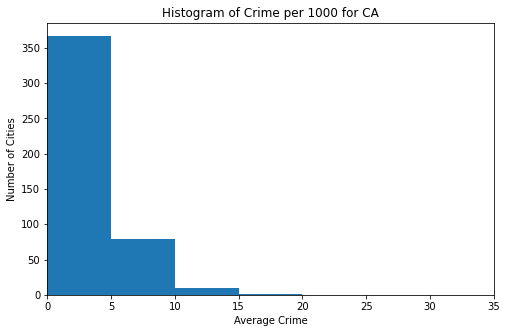

In [28]:
import matplotlib.pyplot as plt

count, bin_edges = np.histogram(crime_df['Crime_per_1000'])
xmin = 0
xmax = 35
#crime_df['Crime_per_1000'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges,  xlim=(xmin, xmax))
crime_df['Crime_per_1000'].plot(kind='hist', figsize=(8, 5), bins = [0,5,10,15,20,25,30,35],  xlim=(xmin, xmax))
plt.title('Histogram of Crime per 1000 for CA') # add a title to the histogram
plt.ylabel('Number of Cities') # add y-label
plt.xlabel('Average Crime') # add x-label

plt.show()

In [29]:
income_df = pd.read_excel('CAincome.xlsx')

In [30]:
income_df.head()

,Place,County,Population,Density,Per_capita_income,Median_house_income,Median_family_income
0,Acalanes Ridge,Contra Costa,1226.0,2659.4,62314,160000,190104
1,Acampo,San Joaquin,776.0,827.3,36756,141250,[7]
2,Acton,Los Angeles,6956.0,177.2,39131,92245,99448
3,Adelanto,San Bernardino,31773.0,567.3,9998,35262,35537
4,Adin,Modoc,215.0,62.6,15452,29583,60083


In [31]:
ca_grouped.head()

,Neighborhood,Accessories Store,Advertising Agency,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Store,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Stop,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Currency Exchange,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Electronics Store,Exhibit,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Historic Site,History Museum,Home Service,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lighthouse,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mobile Phone Shop,Motel,Motorsports Shop,Movie Theater,Moving Target,Museum,Nail Salon,New American Restaurant,Noodle House,Office,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pier,Pizza Place,Plane,Plaza,Poke Place,Pool,Pool Hall,Print Shop,Pub,Public Art,Racetrack,Rental Car Location,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skydiving Drop Zone,Smoke Shop,Soccer Field,South American Restaurant,Spa,Sports Bar,Stables,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio
0,"Arcata,CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.5,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1,"Bakersfield,CA",0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
2,"Beaumont,CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,

In [32]:
ca_grouped[['N1','ST']] = ca_grouped["Neighborhood"].str.split(",", n = 1, expand = True)

In [33]:
ca_grouped.head()

,Neighborhood,Accessories Store,Advertising Agency,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Store,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Stop,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Currency Exchange,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Electronics Store,Exhibit,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Historic Site,History Museum,Home Service,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lighthouse,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mobile Phone Shop,Motel,Motorsports Shop,Movie Theater,Moving Target,Museum,Nail Salon,New American Restaurant,Noodle House,Office,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pier,Pizza Place,Plane,Plaza,Poke Place,Pool,Pool Hall,Print Shop,Pub,Public Art,Racetrack,Rental Car Location,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skydiving Drop Zone,Smoke Shop,Soccer Field,South American Restaurant,Spa,Sports Bar,Stables,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio,N1,ST
0,"Arcata,CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.5,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,Arcata,CA
1,"Bakersfield,CA",0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,Bakersfield,CA
2,"Beaumont,CA",0.0,0.0,0.

In [34]:
DF_1 = ca_grouped.merge(crime_df, left_on='N1', right_on='City', how='left')

In [35]:
DF_2 = DF_1.merge(income_df, left_on='N1', right_on='Place', how='left')


In [36]:
DF_3 = DF_2.dropna()

In [37]:
DF_3.shape

(44, 192)

In [38]:
DF_3.columns
DF_3.head()

,Neighborhood,Accessories Store,Advertising Agency,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Store,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Stop,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Currency Exchange,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Electronics Store,Exhibit,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Historic Site,History Museum,Home Service,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lighthouse,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mobile Phone Shop,Motel,Motorsports Shop,Movie Theater,Moving Target,Museum,Nail Salon,New American Restaurant,Noodle House,Office,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pier,Pizza Place,Plane,Plaza,Poke Place,Pool,Pool Hall,Print Shop,Pub,Public Art,Racetrack,Rental Car Location,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skydiving Drop Zone,Smoke Shop,Soccer Field,South American Restaurant,Spa,Sports Bar,Stables,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio,N1,ST,City,County_x,Polpulation,Population_density,Crime,Crime_per_1000,Property_Crime,Property_crime_per_1000,Place,County_y,Population,Density,Per_capita_income,Median_house_income,Median_family_income
0,"Arcata,CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.5,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,Arcata,CA,Arcata,Humboldt,17748.0,1952.0,78.0,4.39,702.0,39.55,Arcata,Humboldt,17679.0,1944.5,18681,30244,45728
1,"Bakersfield,CA",0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [39]:
Df_4 = DF_3.drop(['N1', 'ST', 'City', 'County_x','Polpulation', 'Population_density', 'Crime','Property_Crime', 'Property_crime_per_1000', 'Place',
       'County_y', 'Population', 'Per_capita_income',
       'Median_family_income'], axis=1)

In [40]:
Df_4.head()

,Neighborhood,Accessories Store,Advertising Agency,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Store,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Stop,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Currency Exchange,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Electronics Store,Exhibit,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Historic Site,History Museum,Home Service,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lighthouse,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mobile Phone Shop,Motel,Motorsports Shop,Movie Theater,Moving Target,Museum,Nail Salon,New American Restaurant,Noodle House,Office,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pier,Pizza Place,Plane,Plaza,Poke Place,Pool,Pool Hall,Print Shop,Pub,Public Art,Racetrack,Rental Car Location,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skydiving Drop Zone,Smoke Shop,Soccer Field,South American Restaurant,Spa,Sports Bar,Stables,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio,Crime_per_1000,Density,Median_house_income
0,"Arcata,CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.5,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,4.39,1944.5,30244
1,"Bakersfield,CA",0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,

In [41]:
Df_4.shape

(44, 178)

In [42]:
Df_4['Median_house_income'] = Df_4['Median_house_income'].astype(int)

In [43]:
from pandas.api.types import is_numeric_dtype

from pandas.api.types import is_string_dtype

is_numeric_dtype(Df_4['Median_house_income'])

True

In [49]:
Df_4[Df_4['Median_house_income'] == Df_4['Median_house_income'].max()]

,Neighborhood,Accessories Store,Advertising Agency,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Store,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Stop,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Currency Exchange,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Electronics Store,Exhibit,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Historic Site,History Museum,Home Service,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lighthouse,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mobile Phone Shop,Motel,Motorsports Shop,Movie Theater,Moving Target,Museum,Nail Salon,New American Restaurant,Noodle House,Office,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pier,Pizza Place,Plane,Plaza,Poke Place,Pool,Pool Hall,Print Shop,Pub,Public Art,Racetrack,Rental Car Location,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skydiving Drop Zone,Smoke Shop,Soccer Field,South American Restaurant,Spa,Sports Bar,Stables,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio,Crime_per_1000,Density,Median_house_income
40,"Palo Alto,CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.88,2764.5,126771


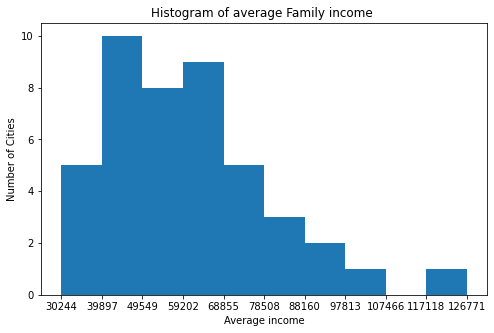

In [59]:
import matplotlib.pyplot as plt

count, bin_edges = np.histogram(Df_4['Median_house_income'])

#crime_df['Crime_per_1000'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges,  xlim=(xmin, xmax))
Df_4['Median_house_income'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram of average Family income ') # add a title to the histogram
plt.ylabel('Number of Cities') # add y-label
plt.xlabel('Average income') # add x-label

plt.show()

In [53]:
Df_4[['Median_house_income','Crime_per_1000']].corr(method = 'pearson')

,Median_house_income,Crime_per_1000
Median_house_income,1.000000,-0.537601
Crime_per_1000,-0.537601,1.000000


In [54]:
import scipy.stats  as stats

stats.pearsonr(Df_4['Median_house_income'], Df_4['Crime_per_1000'])

(-0.5376007300610837, 0.00016775473631715866)

In [60]:
# set number of clusters
kclusters = 3

ca_grouped_clustering = Df_4.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(ca_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1],
      dtype=int32)

In [61]:
Df_4.insert(0, 'Cluster Labels', kmeans.labels_)

In [62]:
Df_4.head()

,Cluster Labels,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Store,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Currency Exchange,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lighthouse,Liquor Store,Lounge,Mac & Cheese Joint,Massage Studio,Mediterranean Restaurant,Memorial Site,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mobile Phone Shop,Motel,Motorsports Shop,Movie Theater,Moving Target,Museum,Nail Salon,New American Restaurant,Noodle House,Office,Optical Shop,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pier,Pizza Place,Plaza,Poke Place,Pool,Pool Hall,Pub,Public Art,Racetrack,Rental Car Location,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skydiving Drop Zone,Smoke Shop,Soccer Field,South American Restaurant,Spa,Sports Bar,Stables,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Crime_per_1000,Density,Median_house_income
0,1,"Arcata,CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,4.39,1944.5,30244
1,1,"Bakersfield,CA",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0

In [63]:
Geocity_df.head()

,ID,LAT,LON,Location
0,[S11],41.48,-120.53,"Alturas,CA"
1,[ACV],40.98,-124.10,"Arcata,CA"
2,[BFL],35.43,-119.05,"Bakersfield,CA"
3,[BAB],39.13,-121.45,"Beale AFB,CA"
4,[BUO],33.93,-116.95,"Beaumont,CA"


In [64]:
Df_5 = Df_4.merge(Geocity_df, left_on='Neighborhood', right_on = 'Location')

In [65]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Df_5['LAT'], Df_5['LON'], Df_5['Neighborhood'], Df_5['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [71]:
cluster_df = Df_5.groupby('Cluster Labels').mean()
cluster_df

,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Store,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Currency Exchange,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lighthouse,Liquor Store,Lounge,Mac & Cheese Joint,Massage Studio,Mediterranean Restaurant,Memorial Site,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mobile Phone Shop,Motel,Motorsports Shop,Movie Theater,Moving Target,Museum,Nail Salon,New American Restaurant,Noodle House,Office,Optical Shop,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pier,Pizza Place,Plaza,Poke Place,Pool,Pool Hall,Pub,Public Art,Racetrack,Rental Car Location,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skydiving Drop Zone,Smoke Shop,Soccer Field,South American Restaurant,Spa,Sports Bar,Stables,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Crime_per_1000,Density,Median_house_income,LAT,LON
Cluster Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.008571,0.002564,0.000000,0.002564,0.014249,0.012500,0.022346,0.006579,0.010897,0.006250,0.000000,0.005556,0.002564,0.005000,0.0,0.006250,0.006250,0.002991,0.008141,0.000000,0.006579,0.008141,0.0,0.002564,0.001563,0.023425,0.014912,0.0,0.032810,0.000000,0.005556,0.006579,0.019991,0.006579,0.000000,0.008333,0.0,0.000000,0.006250,0.009143,0.029957,0.007143,0.021421,0.013901,0.005,0.002564,0.010000,0.002564,0.000000,0.000000,0.000000,0.013158,0.006579,0.00625,0.032564,0.000000,0.000000,0.002564,0.0,0.001563,0.017270,0.002632,0.005,0.006250,0.0,0.0,0.013722,0.002564,0.006579,0.006579,0.001429,0.006563,0.009211,0.0,0.010572,0.0,0.000000,0.005263,0.006579,0.023869,0.003125,0.0,0.0,0.0,0.0,0.000000,0.010000,0.000000,0.001429,0.029825,0.006579,0.001563,0.002564,0.014586,0.009241,0.0,0.000000,0.0,0.011111,0.0,0.000000,0.006579,0.001563,0.000000,0.002991,0.0,0.037400,0.000000,0.0,0.001563,0.001429,0.000000,0.0,0.026667,0.002564,0.0,0.016149,0.003993,0.010000,0.006250,0.000000,0.025317,0.002991,0.008882,0.000000,0.015263,0.0,0.001429,0.001563,0.0,0.0,0.007692,0.0,0.012143,0.000000,0.002632,0.006579,0.006579,0.010377,0.008008,0.000000,0.014286,0.012500,0.007812,0.0,0.0,0.01,0.000000,0.005196,0.000000,0.0,0.000000,0.001429,0.00625,0.0,0.000000,0.001563,0.015451,0.002564,0.0,0.001429,0.001563,0.001563,0.006579,0.000000,0.000000,

In [72]:
cluster_df2 = cluster_df[['Asian Restaurant','Gym', 'Park','Restaurant','Spa','Crime_per_1000','Density','Median_house_income']]
cluster_df2

,Asian Restaurant,Gym,Park,Restaurant,Spa,Crime_per_1000,Density,Median_house_income
Cluster Labels,,,,,,,,
0,0.000000,0.006579,0.025317,0.002632,0.005196,3.28550,6475.930000,69513.250000
1,0.012013,0.014015,0.000000,0.010417,0.000000,5.60125,4873.120833,45128.458333
2,0.008929,0.006494,0.013605,0.017857,0.000000,1.86000,4238.628571,95891.714286


In [75]:
Df_5.groupby('Cluster Labels').count()

,Neighborhood,Accessories Store,Advertising Agency,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Baggage Locker,Bakery,Bank,Bar,Basketball Court,Beach,Beer Bar,Beer Store,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Stop,Business Service,Butcher,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Casino,Cave,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Currency Exchange,Deli / Bodega,Dentist's Office,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Donut Shop,Drugstore,Electronics Store,Exhibit,Factory,Falafel Restaurant,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lighthouse,Liquor Store,Lounge,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mobile Phone Shop,Motel,Motorsports Shop,Movie Theater,Museum,Nail Salon,New American Restaurant,Nightlife Spot,Noodle House,Office,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pier,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Public Art,Racetrack,Rental Car Location,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skydiving Drop Zone,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Tiki Bar,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio,Crime_per_1000,Density,Median_house_income,ID,LAT,LON,Location
Cluster Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
1,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
2,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7

In [78]:
Df_6 = Df_5.loc[Df_5['Cluster Labels'] == 2]
Df_6

,Cluster Labels,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Store,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Currency Exchange,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lighthouse,Liquor Store,Lounge,Mac & Cheese Joint,Massage Studio,Mediterranean Restaurant,Memorial Site,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mobile Phone Shop,Motel,Motorsports Shop,Movie Theater,Moving Target,Museum,Nail Salon,New American Restaurant,Noodle House,Office,Optical Shop,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pier,Pizza Place,Plaza,Poke Place,Pool,Pool Hall,Pub,Public Art,Racetrack,Rental Car Location,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skydiving Drop Zone,Smoke Shop,Soccer Field,South American Restaurant,Spa,Sports Bar,Stables,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Crime_per_1000,Density,Median_house_income,ID,LAT,LON,Location
5,2,"Carlsbad,CA",0.0,0.0,0.0,0.25,0.0,0.0,0.5,0.000000,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.82,2897.0,87416,[CRQ],33.13,-117.28,"Carlsbad,CA"
15,2,"Livermore,CA",0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0625,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0625,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.062500,0.0,0.0625,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187500,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062500,0.00

In [79]:
cluster_df3 = Df_6[['Neighborhood','Asian Restaurant','Gym', 'Park','Restaurant','Spa','Crime_per_1000','Density','Median_house_income']]
cluster_df3

,Neighborhood,Asian Restaurant,Gym,Park,Restaurant,Spa,Crime_per_1000,Density,Median_house_income
5,"Carlsbad,CA",0.0000,0.000000,0.000000,0.000,0.0,1.82,2897.0,87416
15,"Livermore,CA",0.0625,0.000000,0.000000,0.125,0.0,2.74,3122.9,99683
28,"Palo Alto,CA",0.0000,0.000000,0.000000,0.000,0.0,0.88,2764.5,126771
34,"San Clemente,CA",0.0000,0.000000,0.047619,0.000,0.0,1.06,3523.3,91749
35,"San Clemente,CA",0.0000,0.000000,0.047619,0.000,0.0,1.06,3523.3,91749
43,"San Jose,CA",0.0000,0.045455,0.000000,0.000,0.0,3.21,5586.0,83787
44,"San Mateo,CA",0.0000,0.000000,0.000000,0.000,0.0,2.25,8253.4,90087
